In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings('ignore')

In [510]:
#loading the given datasets:
df1=pd.read_csv('Company_Stock.csv')
df1

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [511]:
df1.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [512]:
df1.columns=["Date","Oil","Gold","Comp_stock","Other_share"]
df1

,Date,Oil,Gold,Comp_stock,Other_share
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [513]:
df1.shape

(1984, 5)

In [514]:
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum()

Series([], dtype: float64)

In [515]:
df1.dtypes

Date            object
Oil            float64
Gold           float64
Comp_stock     float64
Other_share    float64
dtype: object

In [516]:
df= pd.DataFrame(df1)

# convert the datetime column to a datetime type
df.Date = pd.to_datetime(df.Date)

# set the column as the index
df.set_index('Date', inplace=True)

In [517]:
df.head()

,Oil,Gold,Comp_stock,Other_share
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [518]:
df.describe()

,Oil,Gold,Comp_stock,Other_share
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


In [519]:
df_oil=pd.DataFrame(data=df)
df_oil.drop("Gold",axis=1,inplace=True)
df_oil.drop("Comp_stock",axis=1,inplace=True)
df_oil.drop("Other_share",axis=1,inplace=True)
df_oil

,Oil
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256
...,...
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352


In [520]:
df_gold=pd.DataFrame(data=df)
df_gold.drop("Oil",axis=1,inplace=True)
df_gold.drop("Comp_stock",axis=1,inplace=True)
df_gold.drop("Other_share",axis=1,inplace=True)
df_gold

,Gold
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


In [521]:
df_Comp_stock=pd.DataFrame(data=df)
df_Comp_stock.drop("Oil",axis=1,inplace=True)
df_Comp_stock.drop("Gold",axis=1,inplace=True)
df_Comp_stock.drop("Other_share",axis=1,inplace=True)
df_Comp_stock

,Comp_stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849
...,...
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008


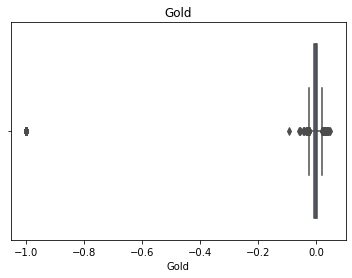

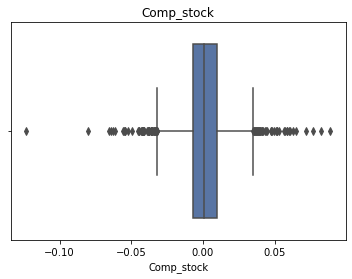

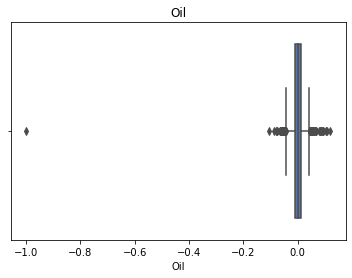

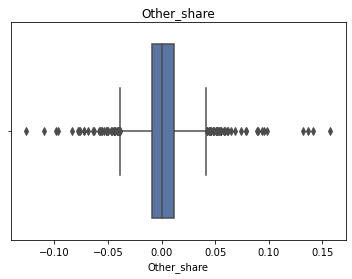

In [522]:
import seaborn as sns
columns={'Oil', 'Gold', 'Comp_stock', 'Other_share'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

## Comp_stock- Testing For Stationarity

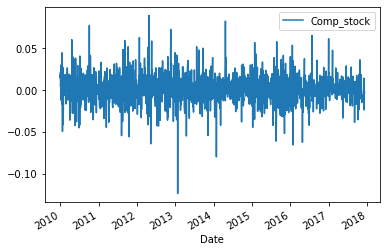

In [523]:
#plot Comp_stock

df_Comp_stock.plot()

In [524]:
df_Comp_stock = df_Comp_stock.replace(0, np.nan)
df_Comp_stock

,Comp_stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849
...,...
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008


In [525]:
df_Comp_stock.isnull().sum()

Comp_stock    2
dtype: int64

In [526]:
df_Comp_Stock=df_Comp_stock.dropna(how='any')

In [527]:
df_Comp_Stock.Comp_stock.round(3)

Date
2009-12-31    0.017
2010-04-01    0.016
2010-05-01    0.002
2010-06-01   -0.016
2010-07-01   -0.002
              ...  
2017-09-11   -0.002
2017-10-11   -0.007
2017-11-13   -0.004
2017-11-14   -0.015
2017-11-15   -0.013
Name: Comp_stock, Length: 1982, dtype: float64

In [528]:
sum(n<0 for n in df_Comp_stock.Comp_stock)

940

In [529]:
test_result=adfuller(df_Comp_Stock['Comp_stock']) # adfuller give us 5 values

In [530]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.481458670962306, 3.084821113180079e-23, 12, 1969, {'1%': -3.433675467561267, '5%': -2.863008999826203, '10%': -2.5675520348463654}, -10637.541220712725)


In [531]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_Comp_stock(Comp_stock):
    result=adfuller(Comp_stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [532]:
adfuller_test_Comp_stock(df_Comp_Stock['Comp_stock'])

ADF Test Statistic : -12.481458670962306
p-value : 3.084821113180079e-23
#Lags Used : 12
Number of Observations Used : 1969
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [533]:
df_Comp_Stock['Comp_Stock First Difference'] = df_Comp_Stock['Comp_stock'] - df_Comp_Stock['Comp_stock'].shift(1)

In [534]:
df_Comp_Stock['Comp_stock'].shift(1).head() # its shift one down

Date
2009-12-31         NaN
2010-04-01    0.017354
2010-05-01    0.015565
2010-06-01    0.001729
2010-07-01   -0.015906
Name: Comp_stock, dtype: float64

In [535]:
df_Comp_Stock['Seasonal First Difference']=df_Comp_Stock['Comp_stock']-df_Comp_Stock['Comp_stock'].shift(12) 
#as seasonal its a 12 month data

In [536]:
df_Comp_Stock.head(14) #when subtracted with nan we get a nan

,Comp_stock,Comp_Stock First Difference,Seasonal First Difference
Date,,,
2009-12-31,0.017354,NaN,NaN
2010-04-01,0.015565,-0.001789,NaN
2010-05-01,0.001729,-0.013836,NaN
2010-06-01,-0.015906,-0.017635,NaN
2010-07-01,-0.001849,0.014058,NaN
2010-08-01,0.006648,0.008497,NaN
2010-11-01,-0.008822,-0.015470,NaN
2010-12-01,-0.011375,-0.002553,NaN
2010-01-13,0.014106,0.025481,NaN


In [537]:
# Again test dickey fuller test
adfuller_test_Comp_stock(df_Comp_Stock['Seasonal First Difference'].dropna())

ADF Test Statistic : -13.22524945024379
p-value : 9.83179376708619e-25
#Lags Used : 26
Number of Observations Used : 1943
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


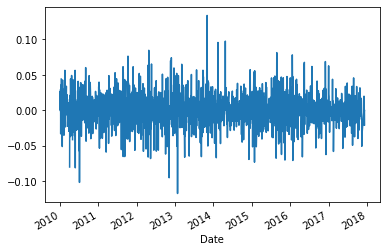

In [538]:
df_Comp_Stock['Seasonal First Difference'].plot()

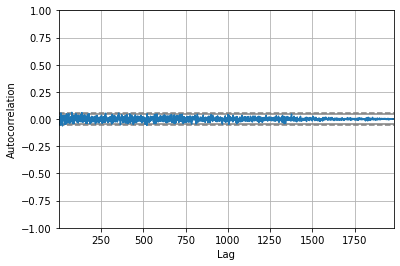

In [539]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_Comp_Stock['Comp_stock'])
plt.show()

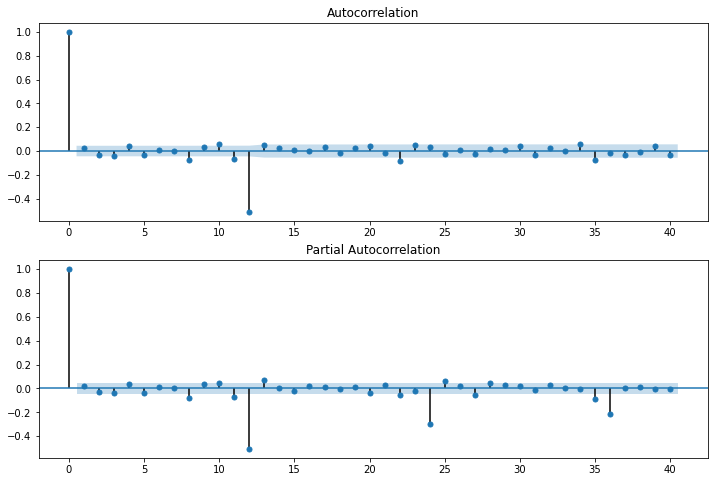

In [540]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_Comp_Stock['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_Comp_Stock['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [541]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_Comp_Stock['Comp_stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp_stock   No. Observations:                 1981
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5367.581
Method:                       css-mle   S.D. of innovations              0.016
Date:                Wed, 28 Oct 2020   AIC                         -10727.162
Time:                        15:48:02   BIC                         -10704.796
Sample:                             1   HQIC                        -10718.946
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.875e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.27e-05
ar.L1.D.Comp_stock     0.0286      0.023      1.226      0.220      -0.017       0.074
ma.L1.D.Comp_stock    -0.9831      0.013    -73.615      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           34.9868           +0.0000j           34.9868            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

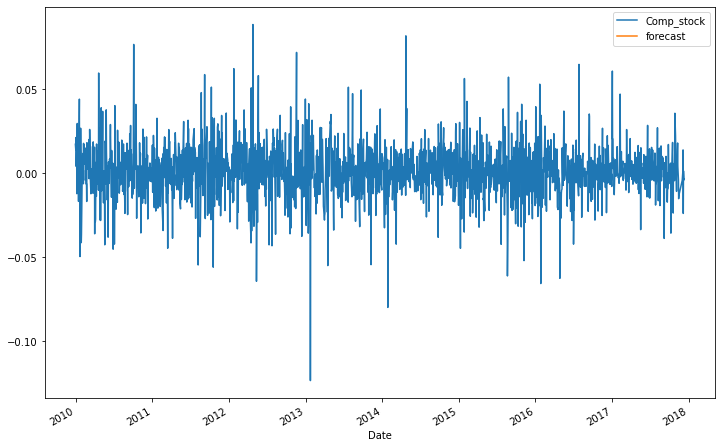

In [542]:
df_Comp_Stock['forecast']=model_fit.predict(start=1583,end=1982,dynamic=True)
df_Comp_Stock[['Comp_stock','forecast']].plot(figsize=(12,8))

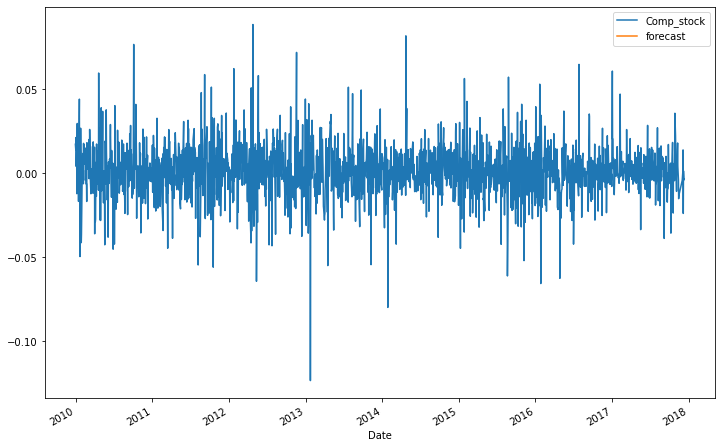

In [543]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(df_Comp_Stock['Comp_stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q)
results=model.fit()
df_Comp_Stock['forecast']=results.predict(start=1781,end=1982,dynamic=True)
df_Comp_Stock[['Comp_stock','forecast']].plot(figsize=(12,8))

#### Gold - Testing For Stationarity

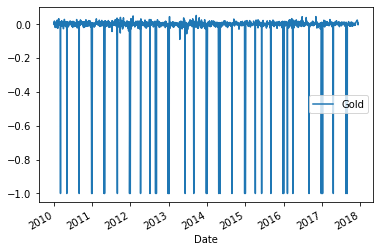

In [544]:
#plot Gold

df_gold.plot()

In [492]:
df_gold = df_gold.replace(0, np.nan)
df_gold

,Gold
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


In [493]:
df_gold.isnull().sum()

Gold    64
dtype: int64

In [494]:
df_gold["Gold"] = df_gold["Gold"].fillna(df_gold["Gold"].dropna().mode().values[0] )

In [495]:
test_result_gold=adfuller(df_gold['Gold']) # adfuller give us 5 values

In [545]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result_gold)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-16.31426101548908, 3.1736637996189835e-29, 5, 1978, {'1%': -3.4336603168110695, '5%': -2.8630023108088545, '10%': -2.5675484732666}, -813.3817952641643)


In [546]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_gold(Gold):
    result=adfuller(Gold)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [547]:
adfuller_test_gold(df_gold['Gold'])

ADF Test Statistic : -15.906853851669046
p-value : 8.208405770369125e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


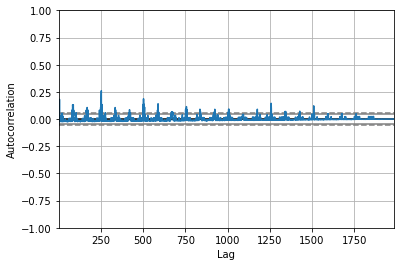

In [548]:
autocorrelation_plot(df_gold['Gold'])
plt.show()

In [551]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_gold['Gold'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Gold   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1068.158
Method:                       css-mle   S.D. of innovations              0.141
Date:                Wed, 28 Oct 2020   AIC                          -2128.316
Time:                        15:48:57   BIC                          -2105.946
Sample:                             1   HQIC                         -2120.099
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.237e-06    5.4e-06     -0.229      0.819   -1.18e-05    9.35e-06
ar.L1.D.Gold    -0.0227      0.022     -1.010      0.313      -0.067       0.021
ma.L1.D.Gold    -1.0000      0.001   -776.242      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -44.1210           +0.0000j           44.1210            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

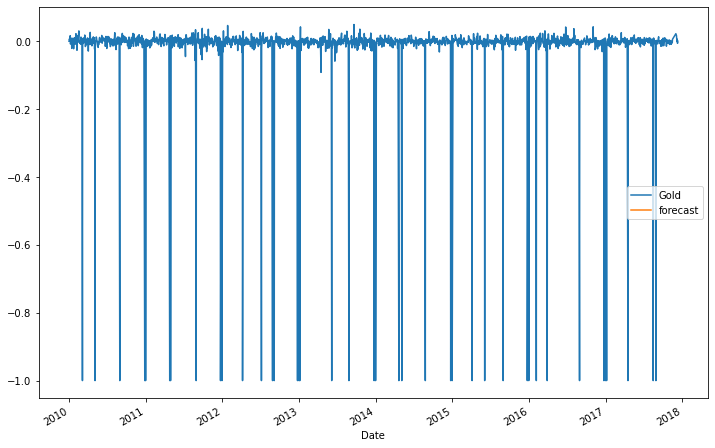

In [554]:
df_gold['forecast']=model_fit.predict(start=1784,end=1984,dynamic=False)
df_gold[['Gold','forecast']].plot(figsize=(12,8))

#### Oil - Testing For Stationarity

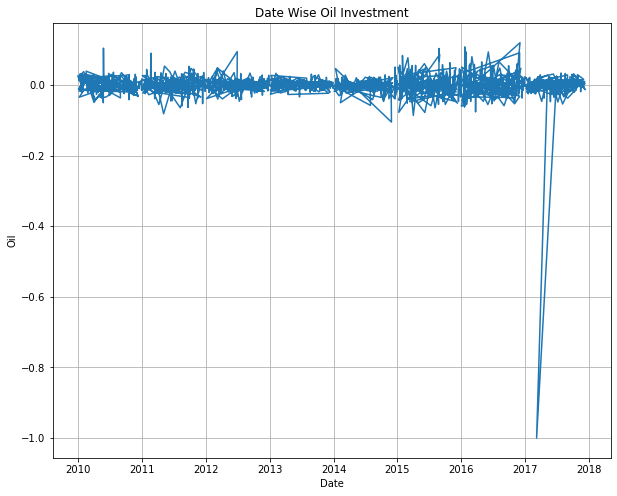

In [502]:
#plot oil
plt.figure(figsize=(10,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Oil')
plt.plot(df['Oil'])
plt.title('Date Wise Oil Investment')
plt.show()

In [503]:
test_result_oil=adfuller(df_oil['Oil']) # adfuller give us 5 values

In [504]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result_oil)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


In [505]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_oil(Oil):
    result=adfuller(Oil)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [506]:
adfuller_test_oil(df_oil['Oil'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [507]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_Comp_Stock['Comp_stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp_stock   No. Observations:                 1981
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5367.581
Method:                       css-mle   S.D. of innovations              0.016
Date:                Wed, 28 Oct 2020   AIC                         -10727.162
Time:                        15:47:18   BIC                         -10704.796
Sample:                             1   HQIC                        -10718.946
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.875e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.27e-05
ar.L1.D.Comp_stock     0.0286      0.023      1.226      0.220      -0.017       0.074
ma.L1.D.Comp_stock    -0.9831      0.013    -73.615      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           34.9868           +0.0000j           34.9868            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""